In [153]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [154]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
df = dfLE.copy()                                        # Create duplicate of data
df.replace([np.inf, - np.inf], np.nan, inplace = True)  # Exchange inf by NaN
df.dropna(inplace=True)
df.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.375,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.125,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.750,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.125,47.6875,2.177835e+10,1.014710e+07,8.04375
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.375,92.3750,1.641579e+11,2.012120e+07,16.50625


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [155]:
Population=df['Population']
Population=np.log(Population)
Population.head()

0    16.115318
1    13.454414
2    16.890508
3    16.132698
5    16.817285
Name: Population, dtype: float64

In [156]:
GDP=df['GDP']
lnGDP=np.log(GDP)
lnGDP.head()

0    22.143172
1    20.877649
2    25.019952
3    23.804182
5    25.824095
Name: GDP, dtype: float64

In [157]:
#Part 1
df['GDPPerCapita']=GDP/Population
df.head()

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPPerCapita
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.375,52.3125,4.136734e+09,9.972260e+06,8.21250,2.566958e+08
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.125,98.0625,1.166938e+09,6.969116e+05,12.13750,8.673269e+07
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.750,91.8750,7.345597e+10,2.164983e+07,12.71250,4.348949e+09
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.125,47.6875,2.177835e+10,1.014710e+07,8.04375,1.349951e+09
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.375,92.3750,1.641579e+11,2.012120e+07,16.50625,9.761263e+09


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

In [313]:
#Print all distributions
def bigGraph1(df_in, columnName):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(round(data,0))
    pmf = thinkstats2.Pmf(data)
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data) #See more below

    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.SubPlot(1, title="Hist")
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2, title="PMF")
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3, title="CDF")
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4, title="Prob Plot")
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5, title="Log PP")
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6, title="PDF")
    thinkplot.Pdf(pdf)
    
    thinkplot.Config()
    return

c:\Users\taraz\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\taraz\OneDrive\Documents\3450\BSIP_Assignment_2_Students\thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


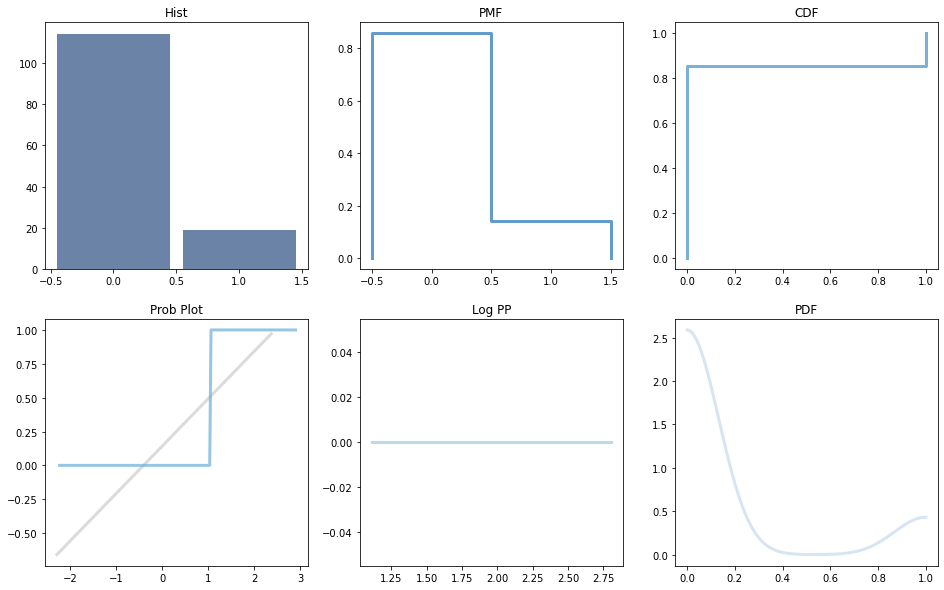

In [177]:
bigGraph1(df,"isDeveloped")

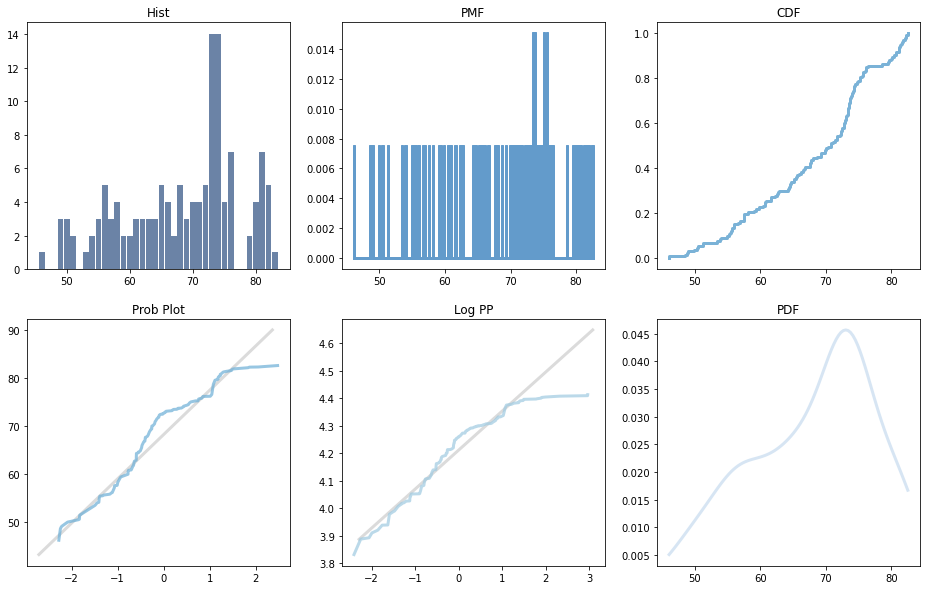

In [178]:
bigGraph1(df,'Lifeexpectancy')

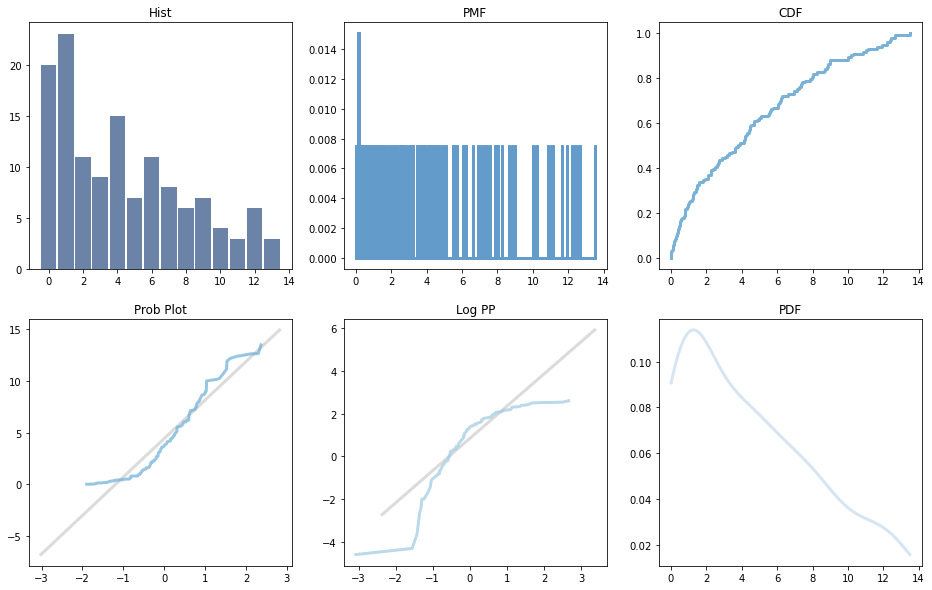

In [198]:
bigGraph1(df,'Alcohol')

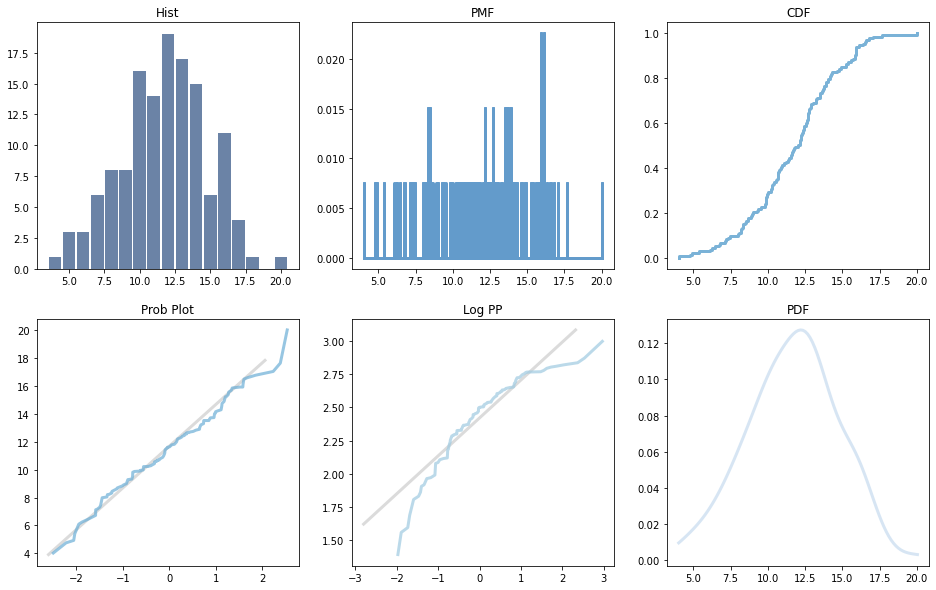

In [264]:
bigGraph1(df,'Schooling')

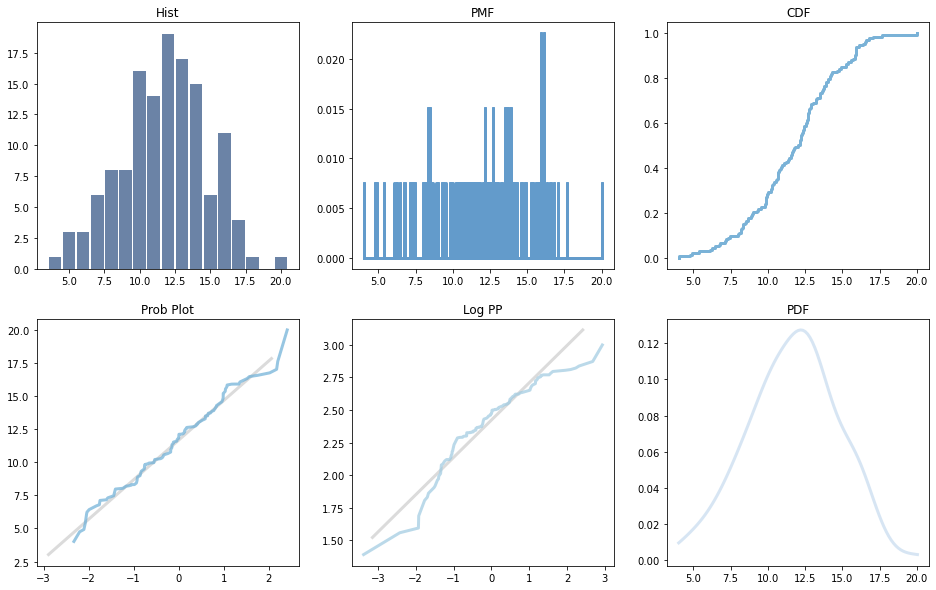

In [315]:
bigGraph1(df,'Schooling')

In [317]:
def bigGraph2(df_in, columnName):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(round(data,-1))
    pmf = thinkstats2.Pmf(data)
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data) #See more below

    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.SubPlot(1, title="Hist")
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2, title="PMF")
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3, title="CDF")
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4, title="Prob Plot")
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5, title="Log PP")
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6, title="PDF")
    thinkplot.Pdf(pdf)
    
    thinkplot.Config()
    return


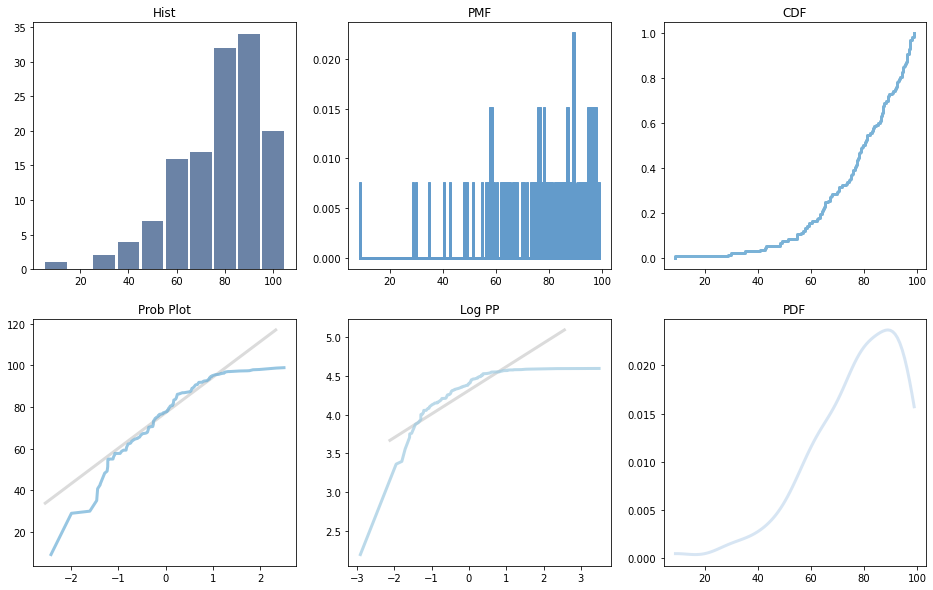

In [205]:
bigGraph2(df,'HepatitisB')

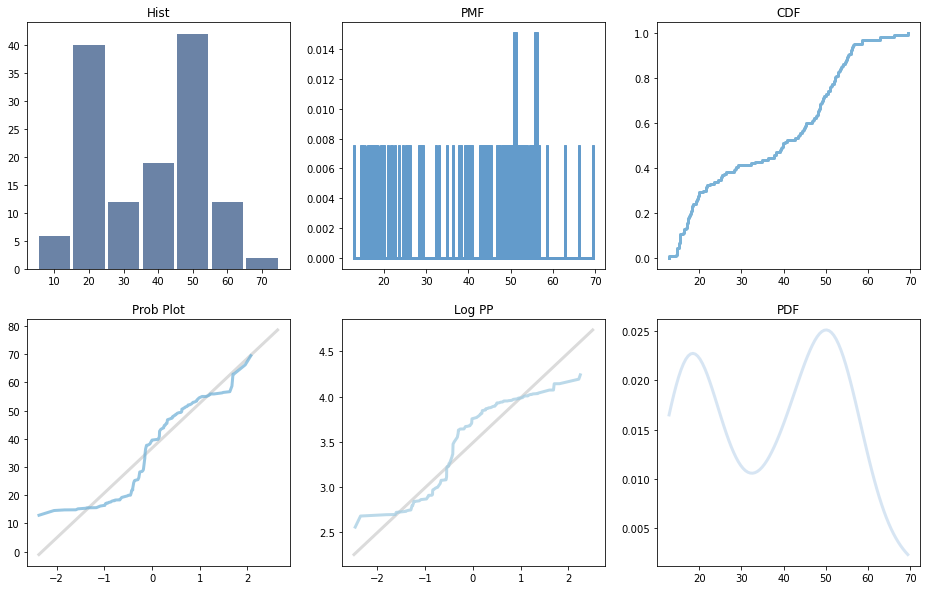

In [246]:
bigGraph2(df,'BMI')

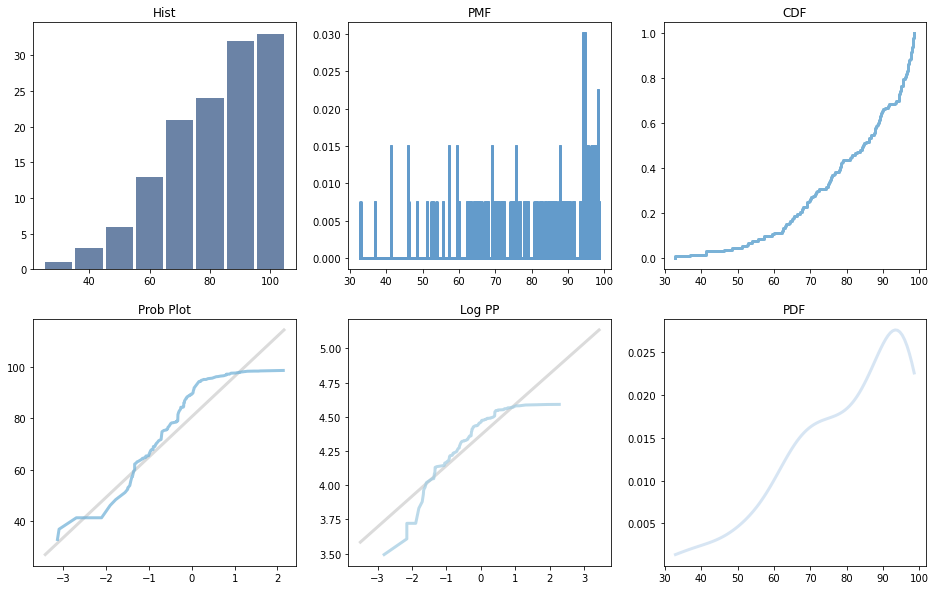

In [259]:
bigGraph2(df,'Polio')

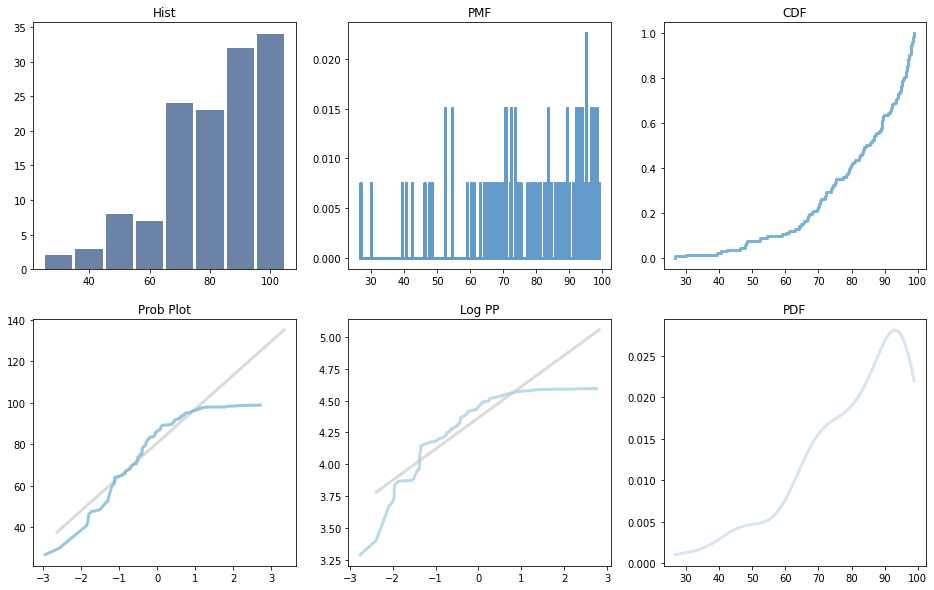

In [260]:
bigGraph2(df,'Diphtheria')

In [321]:
def bigGraph3(df_in, columnName):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(round(data,-2))
    pmf = thinkstats2.Pmf(data)
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data) #See more below

    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.SubPlot(1, title="Hist")
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2, title="PMF")
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3, title="CDF")
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4, title="Prob Plot")
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5, title="Log PP")
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6, title="PDF")
    thinkplot.Pdf(pdf)
    
    thinkplot.Config()
    return


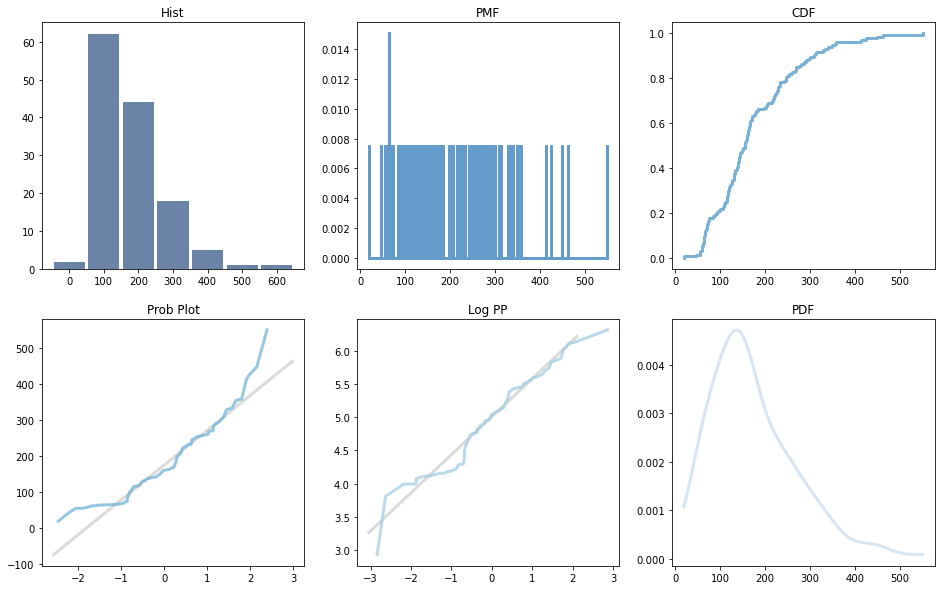

In [253]:
bigGraph3(df,'AdultMortality')

c:\Users\taraz\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\taraz\OneDrive\Documents\3450\BSIP_Assignment_2_Students\thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


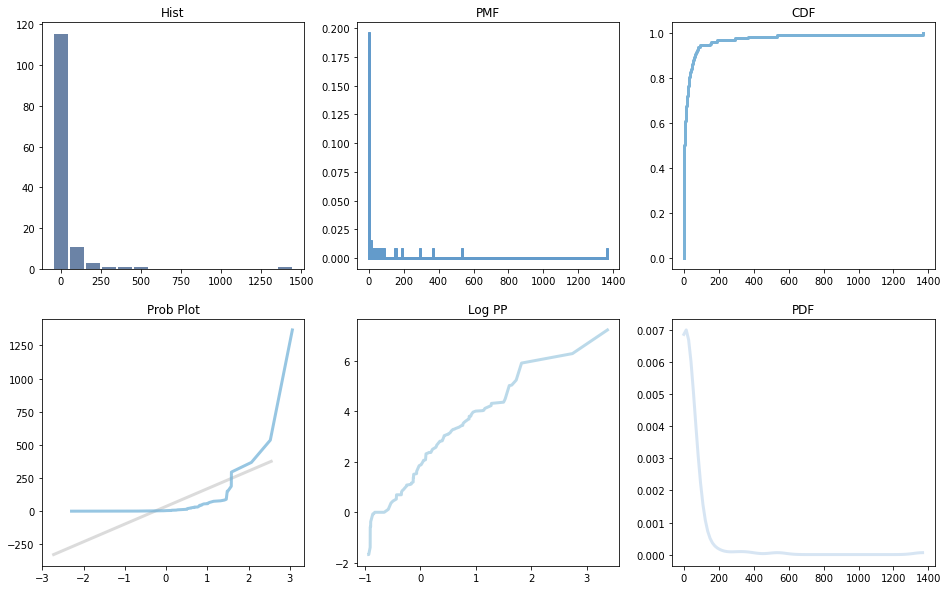

In [322]:
bigGraph3(df,'infantdeaths')

c:\Users\taraz\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\taraz\OneDrive\Documents\3450\BSIP_Assignment_2_Students\thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


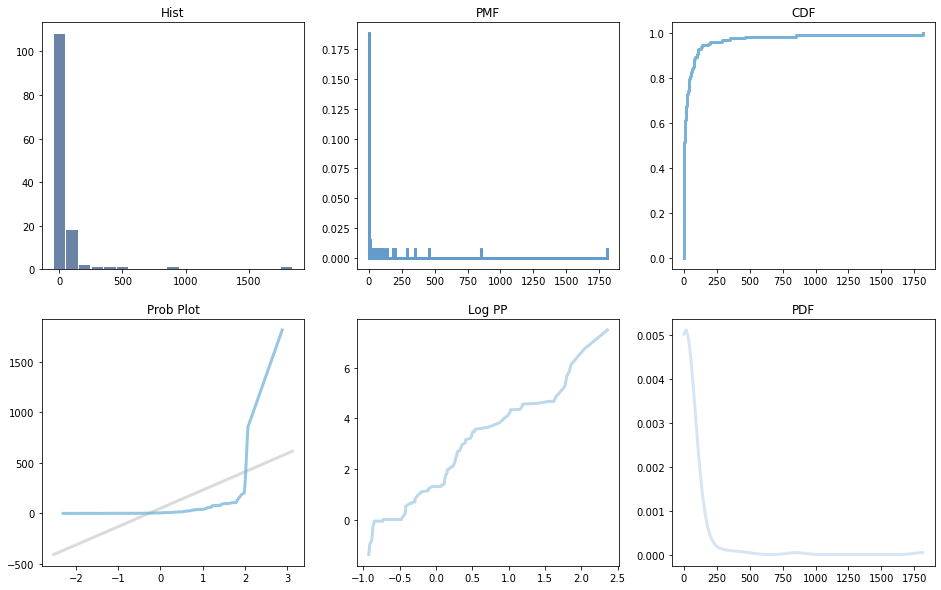

In [255]:
bigGraph3(df,'under-fivedeaths')

In [326]:
def bigGraph4(df_in, columnName):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(round(data,-3))
    pmf = thinkstats2.Pmf(data)
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data) #See more below

    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.SubPlot(1, title="Hist")
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2, title="PMF")
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3, title="CDF")
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4, title="Prob Plot")
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5, title="Log PP")
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6, title="PDF")
    thinkplot.Pdf(pdf)
    
    thinkplot.Config()
    return

c:\Users\taraz\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\taraz\OneDrive\Documents\3450\BSIP_Assignment_2_Students\thinkstats2.py:2450: RuntimeWarning: invalid value encountered in subtract
  ds = xs - mu


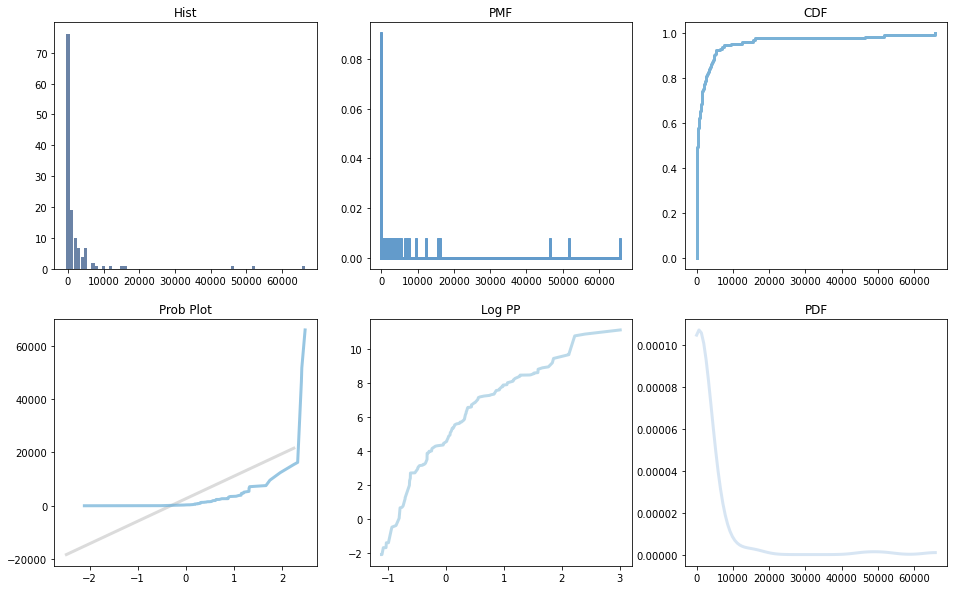

In [332]:
bigGraph4(df,'Measles')

In [329]:
def bigGraph5(df_in, columnName):
    data = pd.Series(df_in[columnName])
    hist = thinkstats2.Hist(round(data,-11))
    pmf = thinkstats2.Pmf(data)
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data) #See more below

    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.SubPlot(1, title="Hist")
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2, title="PMF")
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3, title="CDF")
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4, title="Prob Plot")
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5, title="Log PP")
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6, title="PDF")
    thinkplot.Pdf(pdf)
    
    thinkplot.Config()
    return

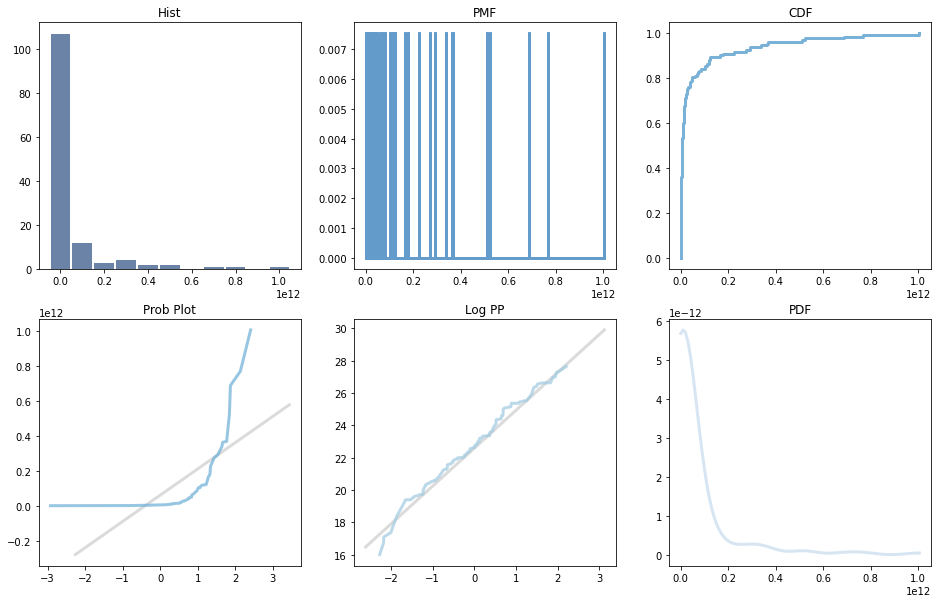

In [281]:
bigGraph5(df,'GDP')

In [307]:
def bigGraph(df_in, columnName):
    data = pd.Series(np.log(df_in[columnName]))
    hist = thinkstats2.Hist(round(data,0))
    pmf = thinkstats2.Pmf(data)
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data) #See more below

    thinkplot.PrePlot(6, rows =2, cols=3)
    thinkplot.SubPlot(1, title="Hist")
    thinkplot.Hist(hist)
    thinkplot.SubPlot(2, title="PMF")
    thinkplot.Pmf(pmf)
    thinkplot.SubPlot(3, title="CDF")
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4, title="Prob Plot")
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5, title="Log PP")
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6, title="PDF")
    thinkplot.Pdf(pdf)
    
    thinkplot.Config()
    return

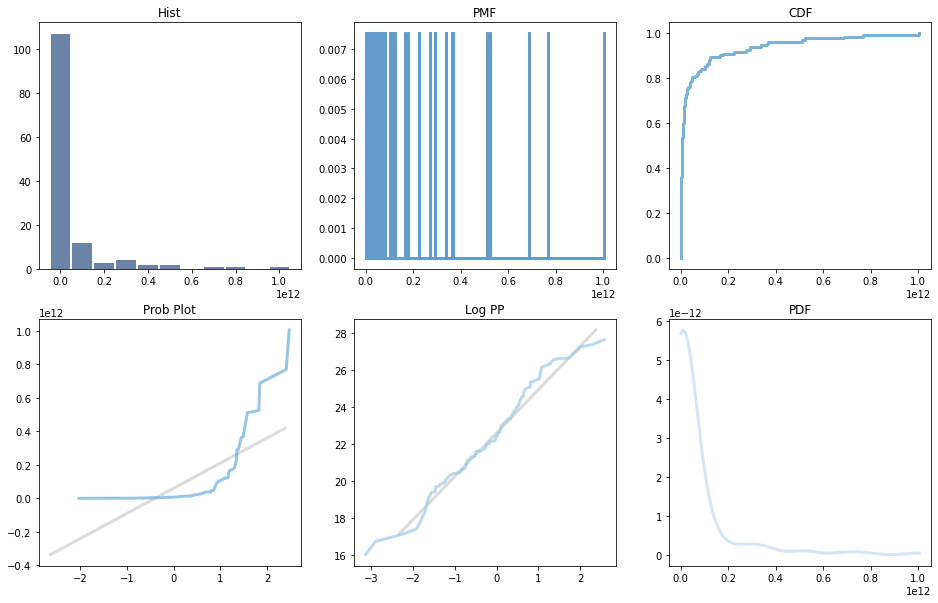

In [308]:
bigGraph5(df,'GDP')

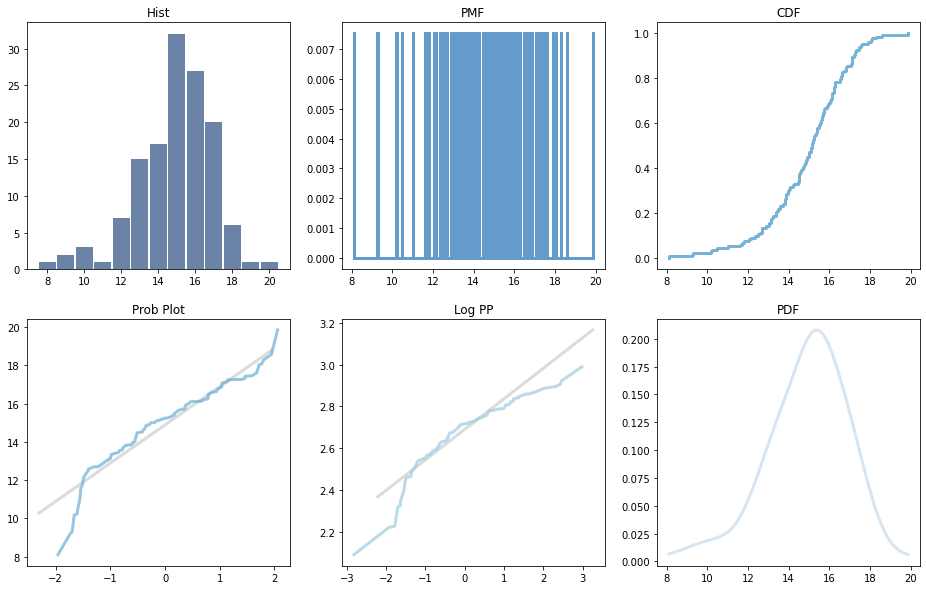

In [310]:
bigGraph(df,'Population')

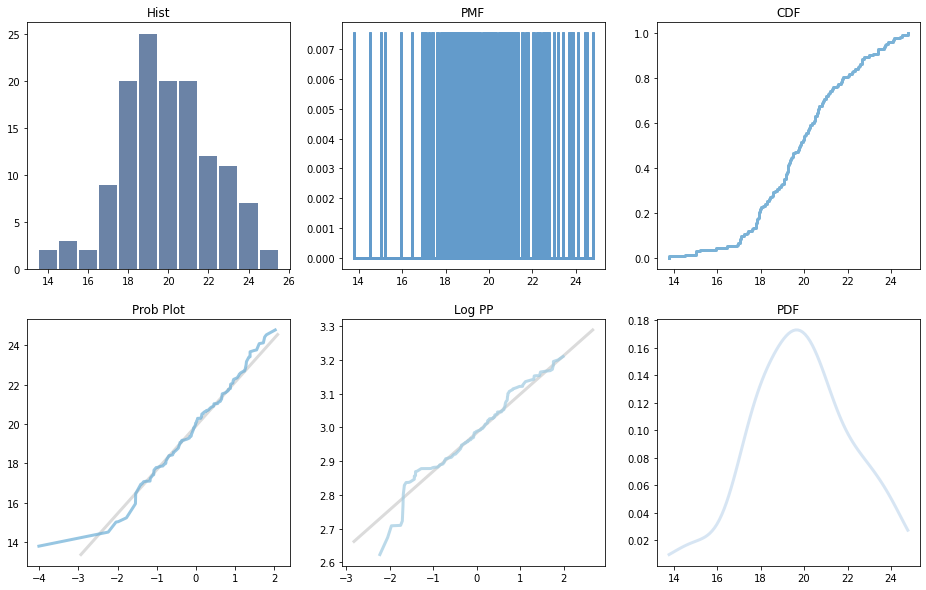

In [309]:
bigGraph(df,'GDPPerCapita')

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

In [ ]:
#Analytical for Schooling

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

In [ ]:
#Analytical for GDP/capita

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [ ]:
#Visualize correlations. 

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [ ]:
#Calculate correlations and analyze. 